In [2]:
from pytorch3d.io import load_obj
from pytorch3d.structures import Meshes
from pytorch3d.renderer import (
    look_at_view_transform,
    OpenGLPerspectiveCameras,
    RasterizationSettings,
    MeshRenderer,
    MeshRasterizer,
    HardPhongShader,
    TexturesVertex,
)
from pytorch3d.transforms import Rotate, Translate
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
DATA_PATH = "../data"
OBJ_NAME = "teapot.obj"
OBJ_PATH = f"{DATA_PATH}/{OBJ_NAME}"

# Load obj file
verts, faces, aux = load_obj(OBJ_PATH)
faces_idx = faces.verts_idx
verts_rgb = torch.ones_like(verts)[None]  # (1, V, 3)
textures = TexturesVertex(verts_features=verts_rgb)

# Create Meshes object
mesh = Meshes(
    verts=[verts],
    faces=[faces_idx],
    textures=textures,
)

# Initialize camera
R = torch.eye(3)[None]  # (1, 3, 3)
T = torch.tensor([[0.0, 0.0, 2.7]])  # (1, 3)
cameras = OpenGLPerspectiveCameras(
    device=verts.device,
    R=R,
    T=T,
)

# Initialize rasterizer
raster_settings = RasterizationSettings(
    image_size=512,
    blur_radius=0.0,
    faces_per_pixel=1,
)

rasterizer = MeshRasterizer(
    cameras=cameras,
    raster_settings=raster_settings,
)

# Initialize shader
shader = HardPhongShader(
    device=verts.device,
    cameras=cameras,
)

# Initialize renderer
renderer = MeshRenderer(
    rasterizer=rasterizer,
    shader=shader,
)

An exception occurred in telemetry logging.Disabling telemetry to prevent further exceptions.
Traceback (most recent call last):
  File "/opt/homebrew/anaconda3/envs/NIE/lib/python3.10/site-packages/iopath/common/file_io.py", line 946, in __log_tmetry_keys
    handler.log_event()
  File "/opt/homebrew/anaconda3/envs/NIE/lib/python3.10/site-packages/iopath/common/event_logger.py", line 97, in log_event
    del self._evt
AttributeError: _evt


In [10]:
rendered_img = renderer(mesh)

In [12]:
def plot_image(image):
    plt.figure(figsize=(10, 10))
    plt.imshow(image.squeeze().cpu().numpy())
    plt.axis("off")

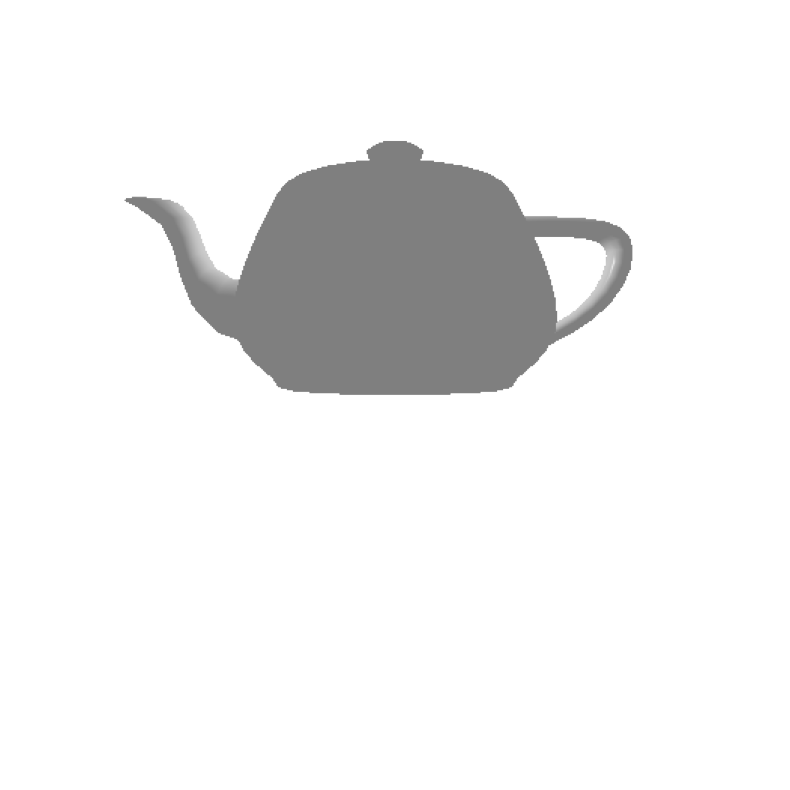

In [13]:
plot_image(rendered_img)

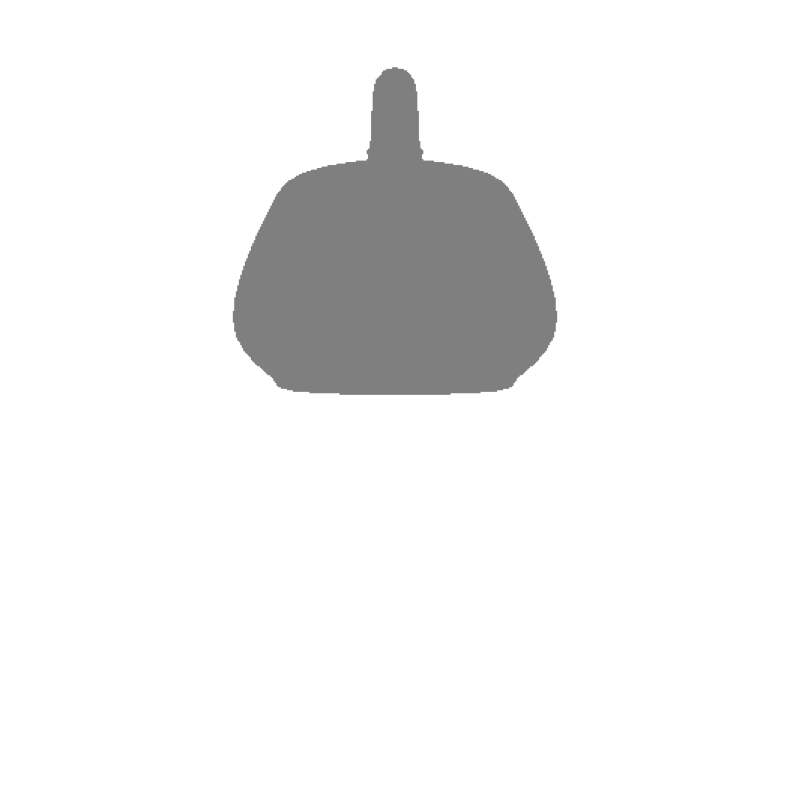

In [29]:
from pytorch3d.transforms import RotateAxisAngle
R = RotateAxisAngle(axis='Y', angle=90).get_matrix()[..., :3, :3]
T = torch.tensor([[0.0, 0.0, 2.7]])

renderer.rasterizer.cameras.R = R
renderer.rasterizer.cameras.T = T
rendered_img = renderer(mesh)

plot_image(rendered_img)

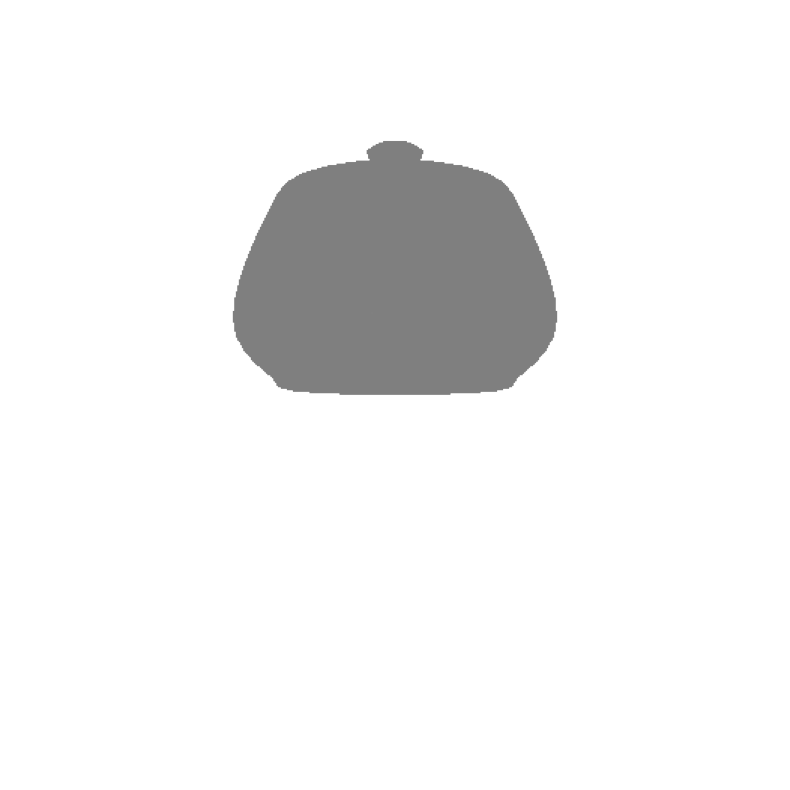

In [27]:
R = RotateAxisAngle(axis='Y', angle=-90).get_matrix()[..., :3, :3]
T = torch.tensor([[0.0, 0.0, 2.7]])

renderer.rasterizer.cameras.R = R
renderer.rasterizer.cameras.T = T
rendered_img = renderer(mesh)

plot_image(rendered_img)

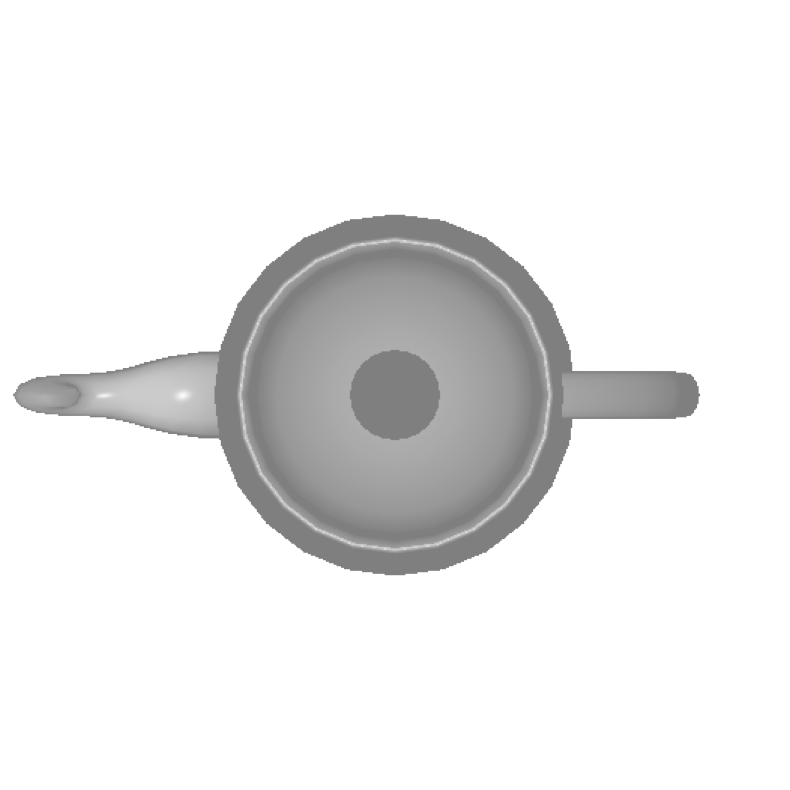

In [31]:
R = RotateAxisAngle(axis='X', angle=-90).get_matrix()[..., :3, :3]
T = torch.tensor([[0.0, 0.0, 2.7]])

renderer.rasterizer.cameras.R = R
renderer.rasterizer.cameras.T = T
rendered_img = renderer(mesh)

plot_image(rendered_img)

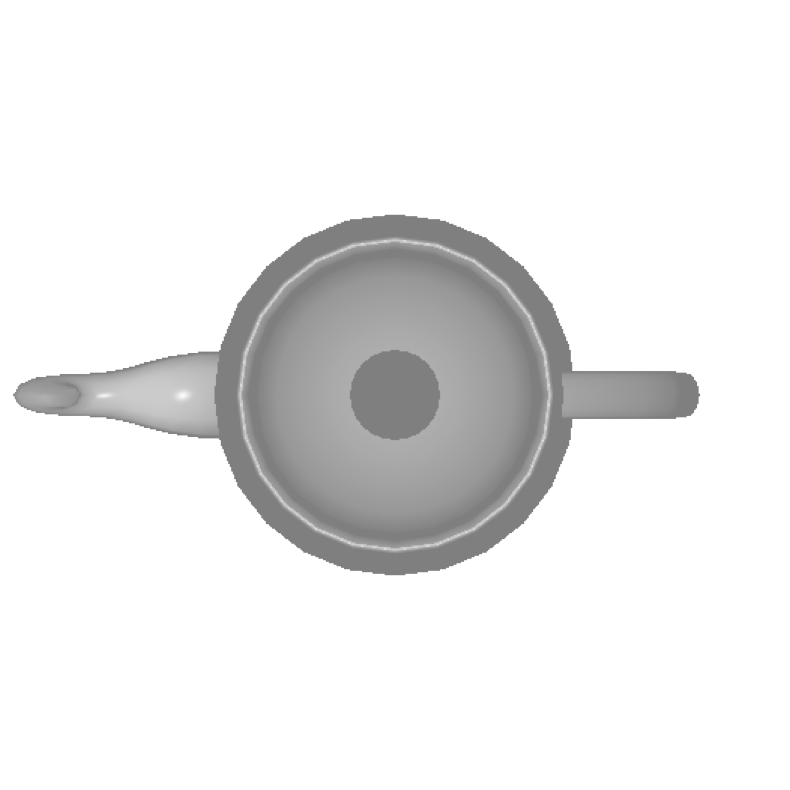

In [39]:
R = RotateAxisAngle(axis='X', angle=-90).get_matrix()[..., :3, :3]
T = torch.tensor([[0.0, 0.0, 2.7]])

renderer.rasterizer.cameras.R = R
renderer.rasterizer.cameras.T = T
rendered_img = renderer(mesh)

plot_image(rendered_img)